In [1]:
from engine import Value
from nn import MLP
import random

In [2]:
import numpy as np
np.random.seed(1337)
random.seed(1337)
import matplotlib.pyplot as plt
%matplotlib inline

### demo on the moons dataset

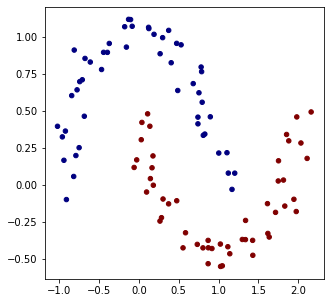

In [3]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [4]:
# loss function
def loss(batch_size=None):
    
    # 
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    ypreds = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*ypredsi).relu() for yi, ypredsi in zip(yb, ypreds)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (ypredsi.data > 0) for yi, ypredsi in zip(yb, ypreds)]
    return total_loss, sum(accuracy) / len(accuracy)

In [16]:
model = MLP(2, [16, 16, 1])
print(f"number of parameters: {len(model.parameters())}")

# for layer in model.layers:
#     for neuron in layer.neurons:
#         print(neuron.b)

number of parameters: 337


step 0 loss 1.785707, accuracy 43.0%


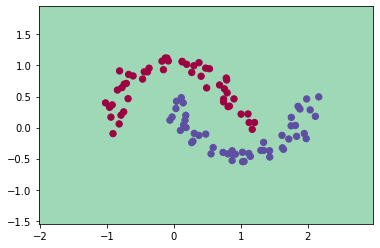

step 4 loss 0.341459, accuracy 86.0%


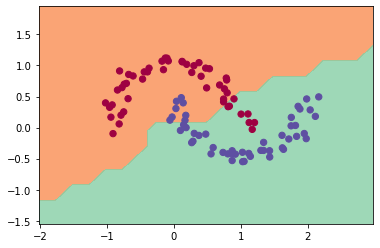

step 8 loss 0.285025, accuracy 87.0%


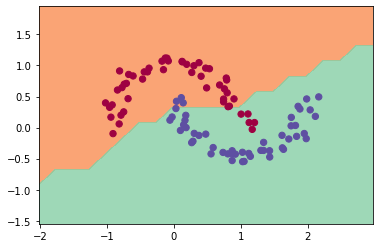

step 12 loss 0.227666, accuracy 91.0%


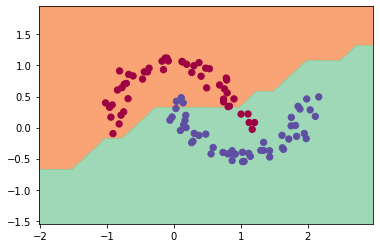

step 16 loss 0.275302, accuracy 89.0%


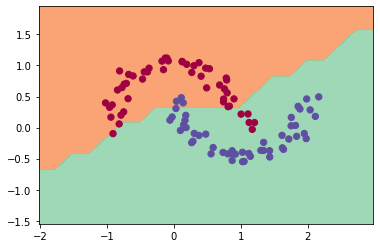

step 20 loss 0.172470, accuracy 93.0%


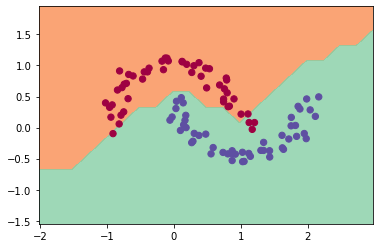

step 24 loss 0.123187, accuracy 94.0%


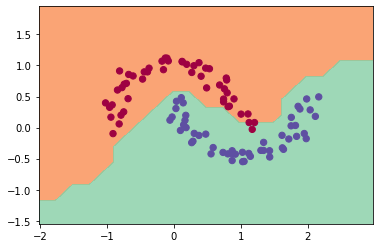

step 28 loss 0.065788, accuracy 99.0%


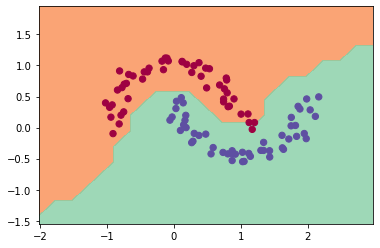

In [17]:
# optimization
for k in range(30):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    # decay lr 
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 4 == 0:
        print(f"step {k} loss {total_loss.data:4f}, accuracy {acc*100}%")
        visualize()

In [14]:
def visualize():
    # visualize decision boundary

    h = 0.25
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Xmesh = np.c_[xx.ravel(), yy.ravel()]
    inputs = [list(map(Value, xrow)) for xrow in Xmesh]
    scores = list(map(model, inputs))
    Z = np.array([s.data > 0 for s in scores])
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

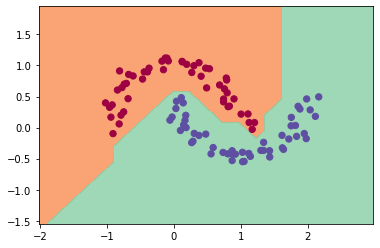

In [10]:
visualize()